In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def compute_quality(gurobi_vals, our_vals):
    return [our_vals[i]/gurobi_vals[i] for i in range(len(our_vals))]

In [84]:
df2 = pd.read_csv('result_2incomplete.csv')
df1 = pd.read_csv('result_1.csv')

In [85]:
print(df1.columns)

Index(['Unnamed: 0', 'b', 'edge_build', 'edge_sort', 'file', 'match',
       'match_gen', 'match_sort', 'total', 'total_incl_build', 'update_exc',
       'update_gen', 'update_sort', 'v', 'weight'],
      dtype='object')


In [86]:
print(df2.columns)

Index(['Unnamed: 0', 'b', 'edge_build', 'edge_sort', 'file', 'match',
       'match_gen', 'match_sort', 'total', 'total_incl_build', 'update_exc',
       'update_gen', 'update_sort', 'v', 'weight'],
      dtype='object')


In [140]:
df1_p = df1[df1["match"].notnull()]
df1_o = df1[df1["match"].isnull()]
df2_p = df2[df2["match"].notnull()]
df2_o = df2[df2["match"].isnull()]


pothen_complete_time = [df1_p.groupby(['v', 'b'])['total'].mean()[1000][i] for i in b]
pothen_incomplete_time = [df2_p.groupby(['v', 'b'])['total'].mean()[1000][i] for i in b]

our_complete_time = [df1_o.groupby(['v', 'b'])['total'].mean()[1000][i] for i in b]
our_incomplete_time = [df2_o.groupby(['v', 'b'])['total'].mean()[1000][i] for i in b]

our_complete_weight = [df1_o.groupby(['v', 'b'])['weight'].mean()[1000][i] for i in b]
our_incomplete_weight = [df2_o.groupby(['v', 'b'])['weight'].mean()[1000][i] for i in b]

pothen_complete_weight = [df1_p.groupby(['v', 'b'])['weight'].mean()[1000][i] for i in b]
pothen_incomplete_weight = [df2_p.groupby(['v', 'b'])['weight'].mean()[1000][i] for i in b]


In [161]:
#Scalability with respect to b. Fixed V.
#|V| = 2000
#matched weights

b= [1, 2, 5, 10, 
    25, 40, 50, 100, 
    200, 500, 750]
gurobi_bipartite_complete = [2.443746132463e+04, 4.395600426821e+04, 8.950450481676e+04, 1.474049259443e+05,
                             2.734791317762e+05, 3.691999918093e+05, 4.238425066778e+05, 6.378085022386e+05,
                             9.246111228884e+05, 1.383790885716e+06, 1.567837596284e+06]
gurobi_bipartite_incomplete = [20175.09126, 36029.82381, 72141.14039, 116903.6445, 
                               210837.2597, 279542.9858, 317828.9475, 461273.107, 
                               634192.8866, 821809.6767, 822828.8704]


#runtimes
runtime_bipartite_complete = our_complete_time
runtime_bipartite_incomplete = our_incomplete_time

quality_bipartite_complete = compute_quality(gurobi_bipartite_complete, our_complete_weight)
quality_bipartite_incomplete = compute_quality(gurobi_bipartite_incomplete, our_incomplete_weight)


pothen_quality_complete = compute_quality(gurobi_bipartite_complete, pothen_complete_weight)
pothen_quality_incomplete = compute_quality(gurobi_bipartite_incomplete, pothen_incomplete_weight)

quality_bipartite_complete[-2] *=10**(6)
quality_bipartite_complete[-1] *=10**(6)
pothen_quality_complete[-2] *=10**(6)
pothen_quality_complete[-1] *=10**(6)

print(quality_bipartite_complete)
print(pothen_quality_complete)
graph_types = ["Complete Bipartite", "Incomplete Bipartite", "Complete General", "Incomplete General"]

[0.7794017450087313, 0.8339725279923129, 0.8877039224189092, 0.9226693011018688, 0.951988542266746, 0.9642687104497176, 0.9692444564374252, 0.9802722883209654, 0.9876595439899578, 0.9954900080782284, 0.9983623327504805]
[0.9788332626798407, 0.9841567885934148, 0.9885904645933669, 0.9931961164942414, 0.996112567093163, 0.997145200886558, 0.9975474223056391, 0.9985348231713436, 0.9991876337307586, 0.9995802214612076, 0.9995486801147793]


#### 

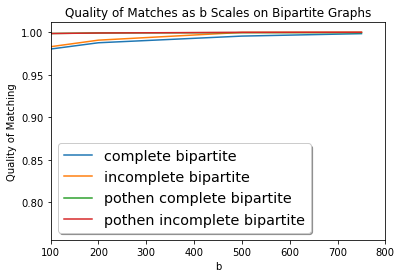

In [162]:
#How does quality scale with b?
x= b
y1 = quality_bipartite_complete
y2 = quality_bipartite_incomplete

fig, ax = plt.subplots()
plt.title("Quality of Matches as b Scales on Bipartite Graphs")
plt.xlabel("b")
plt.ylabel("Quality of Matching")
plt.plot(x, y1, label='lock-free complete')
plt.plot(x, y2, label='lock-free incomplete')
plt.plot(x, pothen_quality_complete, label='pothen complete')
plt.plot(x, pothen_quality_incomplete, label='pothen incomplete')
plt.xlim(100, 800)
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

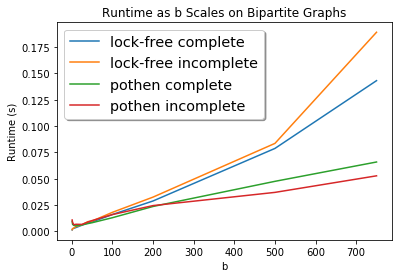

In [164]:
#How does runtime scale with b?
x= b
y1 = runtime_bipartite_complete
y2 = runtime_bipartite_incomplete

fig, ax = plt.subplots()
plt.title("Runtime as b Scales on Bipartite Graphs")
plt.xlabel("b")
plt.ylabel("Runtime (s)")
plt.plot(x, y1, label='lock-free complete')
plt.plot(x, y2, label='lock-free incomplete')
plt.plot(x, pothen_complete_time, label='pothen complete')
plt.plot(x, pothen_incomplete_time, label='pothen incomplete')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

Unnamed: 0  edge_build  edge_sort      match  match_gen  match_sort  \
b   v                                                                           
1   50         13090    0.000531   0.006796   0.006881   0.000987    0.000034   
    200        14610    0.006133   0.005604   0.010117   0.000645    0.000087   
    250        13810    0.008784   0.005268   0.012904   0.000742    0.000125   
    500        12250    0.034043   0.007076   0.027935   0.000794    0.001177   
    750        12650    0.081301   0.006477   0.044255   0.000856    0.001505   
    1000       13370    0.134958   0.007577   0.071896   0.001126    0.001700   
    1250       14170    0.247310   0.011925   0.092563   0.001238    0.002059   
2   50         13130    0.000516   0.006352  47.281847   0.002516    0.000047   
    200        14650    0.006163   0.005356   0.004352   0.000733    0.001110   
    250        13850    0.008571   0.015441   0.005800   0.009978    0.001171   
    500        12290    0.034198   0.006110   0.016812   0.000948    0.001695   
    750        12690    0.080065   0.006765   0.047110   0.001026    0.002475   
    1000       13410    0.133519   0.007641   0.041764   0.001453    0.002905   
    1250       14210    0.240258   0.013000   0.064860   0.001842    0.003745   
5   50         13170    0.000524   0.005559  37.028712   0.000812    0.000110   
    200        14690    0.006238   0.005428   0.004280   0.000988    0.001599   
    250        13890    0.008969   0.005597   0.004066   0.000789    0.002068   
    500        12330    0.035439   0.007160   0.012164   0.001471    0.004009   
    750        12730    0.079962   0.007054   0.019249   0.001765    0.010528   
    1000       13450    0.134850   0.008228   0.030104   0.002092    0.006752   
    1250       14250    0.255716   0.012247   0.042254   0.002518    0.007340   
10  50         13210    0.000524   0.005153  17.121920   0.000979    0.001147   
    200        14730    0.006075   0.005794   0.005874   0.001254    0.002421   
    250        13930    0.008837   0.005730   0.004494   0.001100    0.004138   
    500        12370    0.033946   0.006668   0.012029   0.001752    0.007044   
    750        12770    0.082612   0.007702   0.014877   0.002285    0.009378   
    1000       13490    0.130865   0.008800   0.023358   0.002857    0.008218   
    1250       14290    0.242940   0.013697   0.033472   0.004160    0.009631   
25  50         13250    0.000554   0.005530   0.002987   0.001303    0.001872   
    200        14770    0.006575   0.006323   0.006969   0.001841    0.006670   
...              ...         ...        ...        ...        ...         ...   
40  500        12450    0.035789   0.010665   0.015274   0.004639    0.009030   
    750        12850    0.083079   0.012592   0.020083   0.007265    0.011112   
    1000       13570    0.142449   0.014288   0.030858   0.009013    0.013885   
    1250       14370    0.244899   0.017665   0.038340   0.013349    0.015061   
50  50         13330    0.000545   0.006215   0.002269   0.001276    0.002425   
    200        14850    0.006255   0.006736   0.009208   0.002409    0.006284   
    250        14050    0.008512   0.007224   0.009003   0.003035    0.006623   
    500        12490    0.033798   0.009465   0.017355   0.006282    0.009241   
    750        12890    0.081061   0.012393   0.022399   0.008904    0.010383   
    1000       13610    0.134065   0.015585   0.033767   0.013342    0.014262   
    1250       14410    0.242049   0.019934   0.044176   0.016231    0.022678   
100 200        14890    0.006120   0.006953   0.018210   0.004662    0.007096   
    250        14090    0.008513   0.007907   0.016906   0.006147    0.007913   
    500        12530    0.033426   0.013622   0.029684   0.012689    0.013712   
    750        12930    0.085510   0.018136   0.039036   0.019336    0.016209   
    1000       13650    0.137365   0.024621   0.054996   0.027845    0.024226   
    1250       14450    0.243392   0.0318

In [198]:
df1_p = df1[df1["match"].notnull()]
df1_o = df1[df1["match"].isnull()]
df2_p = df2[df2["match"].notnull()]
df2_o = df2[df2["match"].isnull()]

V = [100, 400, 500, 1000, 1500, 2000, 2500]

df1_p.groupby(['b', 'v'])['total'].mean()[50]

pothen_complete_time = [df1_p.groupby(['b', 'v'])['total'].mean()[50][i / 2] for i in V]
pothen_incomplete_time = [df2_p.groupby(['b', 'v'])['total'].mean()[50][i / 2] for i in V]

our_complete_time = [df1_o.groupby(['b', 'v'])['total'].mean()[50][i / 2] for i in V]
our_incomplete_time = [df2_o.groupby(['b', 'v'])['total'].mean()[50][i / 2] for i in V]

our_complete_weight = [df1_o.groupby(['b', 'v'])['weight'].mean()[50][i / 2] for i in V]
our_incomplete_weight = [df2_o.groupby(['b', 'v'])['weight'].mean()[50][i / 2] for i in V]

pothen_complete_weight = [df1_p.groupby(['b', 'v'])['weight'].mean()[50][i / 2] for i in V]
pothen_incomplete_weight = [df2_p.groupby(['b', 'v'])['weight'].mean()[50][i / 2] for i in V]

In [204]:
#Scalability with respect to |V|

b = 50

df3 = pd.read_csv('result_incomplete_gurobi.csv')

x = [df3.groupby(['b', 'v'])['weight'].mean()[50][i / 2 ] for i in V]

#gurobi fixed b matched weight
gurobi_fixed_b_bipartite_complete = [4.214260276529e+03, 4.109336334216e+04, 5.764837470390e+04, 1.586773006239e+05, 
                                     2.831886810939e+05, 4.238425066778e+05, 5.795129769515e+05]
gurobi_fixed_b_bipartite_incomplete = x


### How does runtime scale with |V|?
x= V
y1 = runtime_fixed_b_bipartite_complete
y2 = runtime_fixed_b_bipartite_incomplete

fig, ax = plt.subplots()
plt.title("Runtime as |V| Scales on Bipartite Graphs")
plt.xlabel("Number of Vertices (|V|)")
plt.ylabel("Runtime (us)")
plt.plot(x, y1, label='complete bipartite')
plt.plot(x, y2, label='incomplete bipartite')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

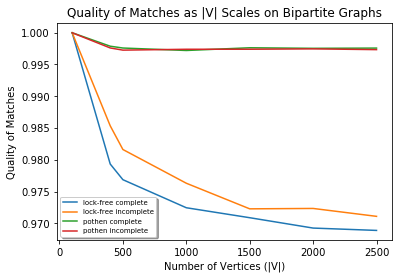

In [206]:
#How does quality scale with |V|
quality_fixed_b_bipartite_complete = compute_quality(gurobi_fixed_b_bipartite_complete, our_complete_weight)
quality_fixed_b_bipartite_incomplete = compute_quality(gurobi_fixed_b_bipartite_incomplete, our_incomplete_weight)

pothen_quality_complete = compute_quality(gurobi_fixed_b_bipartite_complete, pothen_complete_weight)
pothen_quality_incomplete = compute_quality(gurobi_fixed_b_bipartite_incomplete, pothen_incomplete_weight)


x= V
y1 = quality_fixed_b_bipartite_complete
y2 = quality_fixed_b_bipartite_incomplete

fig, ax = plt.subplots()
plt.title("Quality of Matches as |V| Scales on Bipartite Graphs")
plt.xlabel("Number of Vertices (|V|)")
plt.ylabel("Quality of Matches")
plt.plot(x, y1, label='lock-free complete')
plt.plot(x, y2, label='lock-free incomplete')
plt.plot(x, pothen_quality_complete, label='pothen complete')
plt.plot(x, pothen_quality_incomplete, label='pothen incomplete')
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-small')

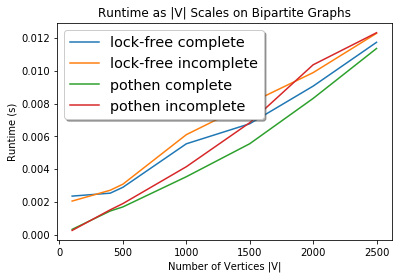

In [207]:
#How does runtime scale with |V|?
x= V
y1 = our_complete_time
y2 = our_incomplete_time

fig, ax = plt.subplots()
plt.title("Runtime as |V| Scales on Bipartite Graphs")
plt.xlabel("Number of Vertices |V|")
plt.ylabel("Runtime (s)")
plt.plot(x, y1, label='lock-free complete')
plt.plot(x, y2, label='lock-free incomplete')
plt.plot(x, pothen_complete_time, label='pothen complete')
plt.plot(x, pothen_incomplete_time, label='pothen incomplete')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')